BASC0038 Algorithms, Logic and Structure

# Week 4: Quicksort

Author: Sam J. Griffiths (sam.griffiths.19@ucl.ac.uk)

---

# Sorting by partitioning

In the previous worksheet, we explored how the general principle of *divide-and-conquer* can be used to solve problems more easily, and hence how lower complexity classes can be achieved by applying this idea recursively. The *mergesort* algorithm took a related linear-time task &ndash; merging two sorted lists &ndash; to create a linearithmic-time sort.

Let us look at another related linear-time task: partitioning a list. Specifically, the task is to split a list into two sublists according to a value referred to as a *pivot*, where one sublist contains all the elements less than the pivot and the other contains all the elements greater than it (equal values will go into either according to convention).

Assume that the pivot is itself one of the elements in the list. Assuming no prior ordering in the list, it should be easy to see that this is a linear-time task. Every other element in the list is compared against the pivot, so the total number of comparisons performed is $T(n)=n-1=O(n)$.

*Quicksort* is a sorting algorithm which chooses a value in the list as the pivot and partitions the list into the elements less than and greater than the pivot. With the pivot placed between these resultant sublists, it is now in its final sorted position. Quicksort is then applied recursively to both sublists.

In the previous worksheets, exercises have involved implementing sorting functions which craft and return a sorted copy of the input array. A version of quicksort (where the last element in a list is always chosen as the pivot) matching this format would be:

In [ ]:
def quicksort_recursive(array):
  # Base case for empty or singular list
  n = len(array)
  if n < 2:
    return array.copy()

  # Recursive case pivots on last element
  lower = []
  upper = []
  for value in array[:-1]:
    if value < array[-1]:
      lower.append(value)
    else:
      upper.append(value)

  return quicksort_recursive(lower) + [array[-1]] + quicksort_recursive(upper)

In [ ]:
data = [48, 38, 28, 14, 38, 56, 49, 30, 39, 0, 5, 4, 31, 88, 83, 32, 52, 42,
        83, -2, 69, 95, 75, 52, 21, 23, 53, 42, 6]
sorted_data = quicksort_recursive(data)
print(sorted_data)

[-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52, 52, 53, 56, 69, 75, 83, 83, 88, 95]


# Complexity analysis

## Worst case

To quicksort a list of size $n$, we first partition by selecting one element as the pivot and comparing every other element to it, thus requiring $n-1$ comparisons. The worst case is the pivot being less than or greater than every other element, thus yielding just one partition of size $n-1$, upon which quicksort is then recursively performed. This gives a complexity analysis identical to the worst case of selection sort and insertion sort:

\begin{align}
T(n) &= n-1 + T(n-1) \\
&= n-1 + n-1-1 + T(n-2) \\
&= n-1 + n-1-1 + n-2-1 + T(n-3) \\
&\;\;\vdots \\
&= kn - (1+2+3+\dots+k) + T(n-k)
\end{align}

Note that $(1+2+3+\dots+k)$ is an arithmetic series (specifically, the $k$th triangular number) with sum $k(k+1)/2$:

\begin{align}
T(n) = kn - \frac{k(k+1)}{2} + T(n-k)
\end{align}

The base case is a set of size 1:

\begin{align}
n-k &= 1 \\
\implies \quad k &= n-1
\end{align}

Substituting this back in gives

\begin{align}
T(n) &= n(n-1) - \frac{n(n-1)}{2} + T(1) \\
&= \frac{n(n-1)}{2} + T(1)
\end{align}

A set of size 1 requires 0 comparisons to sort, so $T(1)=0$:

\begin{align}
T(n) &= \frac{1}{2}n^2 - \frac{1}{2}n \\
\therefore \quad T(n) &= O(n^2)
\end{align}

## Best case

The best case in quicksort is the pivot selected being the median of all elements, partitioning the list into two halves upon which quicksort is then recursively performed:

\begin{align}
T(n) = n-1 + T{\left( \left\lfloor{\frac{n-1}{2}}\right\rfloor \right)} + T{\left( \left\lceil{\frac{n-1}{2}}\right\rceil \right)}
\end{align}

By our intuition so far, this recurrence relation solves to $O(n\log{n})$ and at this stage is left as an exercise.

# ✍️ Exercise: In-place partitioning

Hereinbefore a functional-style quicksort implementation is given; that is, one which takes an immutable list and returns a new, sorted list. If you are working in an imperative programming paradigm as opposed to functional (hint: for the most part, you're likely to be), directly sorting a provided list in-place is usually more useful.

Implement a partitioning function as `partition(array, low, high, pivot)`. This function should rearrange the given `array` such that it contains all of its values less than the value at `pivot`, followed by the value at `pivot`, followed by all valus greater than or equal to the value at `pivot`. The parameters `low` and `high` control the range affected, such that is is possible to partition any sublist within `array` alone. For example, partitioning an entire list using the last element as the pivot would be done be `partition(array, 0, len(array)-1, len(array)-1)`.

The function should also return the new index of the pivot value in the final rearranged list.

Hint: as we are implementing this solution in-place, this exercise matches that given in the lectures for quicksort, aside from the fact we are not currently assuming that `pivot` is `n-1`!

<h2>👇</h2>

In [ ]:
def partition(array, low, high, pivot):
  """Reorder elements in a list range such that a pivot separates them.

  Args:
    array: List of values to reorder.
    low: Index representing start of range.
    high: Index representing end of range.
    pivot: Index of pivot value.

  Returns:
    New index of the given pivot value.

  """
  # Boundary between lower and upper partitions
  i = low

  # Compare every other element against pivot
  for j in range(low, high + 1):
    if j != pivot and array[j] < array[pivot]:
      # Swap into lower partition and increment boundary
      array[i], array[j] = array[j], array[i]
      i += 1

  # Swap pivot value into final position
  array[i], array[pivot] = array[pivot], array[i]

  return i

🟢

In [ ]:
# Output should be:
# [0, 5, 4, -2, 6, 56, 49, 30, 39, 48, 38, 28, 31, 88, 83, 32, 52, 42, 83, 14,
# 69, 95, 75, 52, 21, 23, 53, 42, 38]
# 4

data = [48, 38, 28, 14, 38, 56, 49, 30, 39, 0, 5, 4, 31, 88, 83, 32, 52, 42,
        83, -2, 69, 95, 75, 52, 21, 23, 53, 42, 6]
n = len(data)
p = partition(data, 0, n - 1, n - 1)
print(data)
print(p)

[0, 5, 4, -2, 6, 56, 49, 30, 39, 48, 38, 28, 31, 88, 83, 32, 52, 42, 83, 14, 69, 95, 75, 52, 21, 23, 53, 42, 38]
4


# ✍️ Exercise: In-place quicksort

Use the above implementation of `partition` to implement quicksort as `quicksort_naive(array)`, which sorts the given `array` in-place and does not need to return any value.

The last element should always be used as a pivot.

In the below code skeleton, an inner function which recurses is defined in order to abstract `low` and `high` away from the user interface.



<h2>👇</h2>

In [ ]:
def quicksort_naive(array):
  """Sort a list in-place via quicksort.

  The last element is always used as the pivot.

  Args:
    array: Unsorted list.

  """
  def qsort(array, low, high):
    if low < high:
      pivot = partition(array, low, high, high)
      qsort(array, low, pivot - 1)
      qsort(array, pivot + 1, high)

  qsort(array, 0, len(array) - 1)

🟢

In [ ]:
# Output should be:
# [-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52,
# 52, 53, 56, 69, 75, 83, 83, 88, 95]

data = [48, 38, 28, 14, 38, 56, 49, 30, 39, 0, 5, 4, 31, 88, 83, 32, 52, 42,
        83, -2, 69, 95, 75, 52, 21, 23, 53, 42, 6]
quicksort_naive(data)
print(data)

[-2, 0, 4, 5, 6, 14, 21, 23, 28, 30, 31, 32, 38, 38, 39, 42, 42, 48, 49, 52, 52, 53, 56, 69, 75, 83, 83, 88, 95]


# ✍️ Exercise: Space optimisation

As always, it's time to perform some timing experiments. However, if you were to use your quicksort as it stands, you'll notice the inherent issue with recursive implementations discussed previously: stack overflow, even for modest input sizes.

Quicksort's recursion is more complicated than things like binary search and mergesort. Consequently, an 'iterative' version would be to manually emulate the call stack with an explicit stack data structure. This is out of scope for this worksheet.

Instead, we will point the finger at a more fundamental problem: space complexity. Here, the main component of space usage is the function call stack itself. In the best case (i.e. where the recursion constitues a balanced binary tree) the call stack reaches a depth of $O(\log{n})$. However, in the worst case (i.e. where only one non-zero partition is formed and pivots are thus finalised one-by-one), the call stack reaches $O(n)$. Linear stack usage explains the occurrence of stack overflow for even modest worst-case problem instances.

An alteration to the algorithm can bound the stack usage to $O(\log{n})$ even in the worst case, however. Instead of recursing on both sublists after partitioning, we recurse on the *smaller sublist only*, and instead manually update the `low`/`high` arguments to loop onto the larger sublist.

Implement this space-optimised version as `quicksort`. Hint: the conditional on `low` and `high` should be changed into a loop and the smaller of two sublists determined.

In [ ]:
def quicksort(array):
  """Sort a list in-place via quicksort.

  The last element is always used as the pivot.

  Args:
    array: Unsorted list.

  """
  def qsort(array, low, high):
    while low < high:
      pivot = partition(array, low, high, high)
      if pivot - low <= high - pivot:
        qsort(array, low, pivot - 1)
        low = pivot + 1
      else:
        qsort(array, pivot + 1, high)
        high = pivot - 1

  qsort(array, 0, len(array) - 1)

# ✍️ Exercise: Timing experiments

Using that which you've learned from previous worksheets, perform worst-case and average-case timing experiments on `quicksort`.

First, perform a worst-case experiment with problem sizes $n \in \{100,200,300,\dots,1200\}$. Don't forget that this quicksort implementation sorts in-place, so you must call it on a new copy of the test data to avoid affecting subsequent runs like `quicksort(array.copy())` instead of merely `quicksort(array)`.

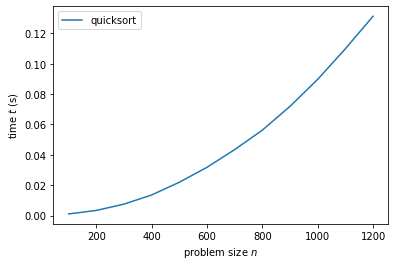

In [ ]:
import time

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def time_function(function, runs=1, average=min):
  """Test the execution time of a given function.

  Args:
    function: Function to time.
    runs (int, optional): Number of runs. Defaults to 1.

  Returns:
    Function time (minimum of runs).

  """
  results = [None] * runs
  for i in range(runs):
    t0 = time.perf_counter()
    function()
    t1 = time.perf_counter()
    results[i] = t1 - t0
  
  return average(results)


# n = {100, 200, 300, ..., 1200}
problem_sizes = [(i + 1) * 100 for i in range(12)]

# Lists of time results
t_quicksort = []

for n in problem_sizes:
  # List of numbers from 0 to n-1
  array = [i for i in range(n)]

  # Obtain minimum time of 10 runs for each algorithm
  runs = 10
  t_quicksort.append(time_function(
      lambda: quicksort(array.copy()),
      runs))

# Plot graph of times
plt.plot(problem_sizes, t_quicksort, label="quicksort")
plt.legend()
plt.xlabel(r"problem size $n$")
plt.ylabel(r"time $t$ (s)")
plt.show()

You should observe a relatively smooth quadratic curve representing quicksort's $O(n^2)$ worst-case complexity.

Next, perform an average-case experiment with randomly generated lists of the same problem sizes as before. This time, also compare it against mergesort from the previous worksheet.

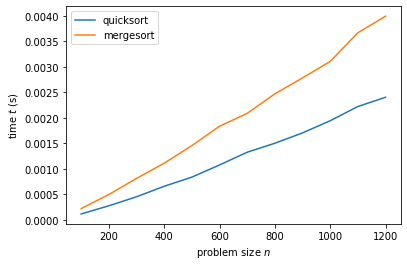

In [ ]:
def merge(a, b):
  """Merge two sorted lists into one.

  Args:
    a: First sorted list.
    b: Second sorted list.
  
  Returns:
    A new list containing all elements in a and b, sorted.

  """
  result = []

  # Append smallest values to result until either list is exhausted
  i = j = 0
  while i < len(a) and j < len(b):
    if a[i] < b[j]:
      result.append(a[i])
      i += 1
    else:
      result.append(b[j])
      j += 1

  # Append all remaining values from the unexhausted list
  if i < len(a):
    result.extend(a[i:])
  else:
    result.extend(b[j:])

  return result


def mergesort_iterative(array):
  """Sort a list via iterative (bottom-up) mergesort.

  Args:
    array: Unsorted list.

  Returns:
    A new list containing all elements in array, sorted.

  """
  n = len(array)
  result = array.copy()

  # Merge runs of length 1, 2, 4, 8, ...
  length = 1
  while length < n:
    # Merge each pair of runs
    for i in range(0, n, 2 * length):
      mid = i + length
      upper = i + 2 * length
      result[i:upper] = merge(result[i:mid], result[mid:upper])
    length *= 2

  return result

import time
import random
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def time_function(function, runs=1, average=min):
  """Test the execution time of a given function.

  Args:
    function: Function to time.
    runs (int, optional): Number of runs. Defaults to 1.

  Returns:
    Function time (minimum of runs).

  """
  results = [None] * runs
  for i in range(runs):
    t0 = time.perf_counter()
    function()
    t1 = time.perf_counter()
    results[i] = t1 - t0
  
  return average(results)


# n = {100, 200, 300, ..., 1200}
problem_sizes = [(i + 1) * 100 for i in range(12)]

# Lists of time results
t_quicksort = []
t_mergesort = []

# Number of random samples to take
rand_samples = 5

for n in problem_sizes:
  # Times recorded for this value of n
  t_n_quicksort = []
  t_n_mergesort = []

  for _ in range(rand_samples):
    # Random list of length n
    array = [random.random() for _ in range(n)]

    # Obtain minimum time of 10 runs for each algorithm
    runs = 10  
    t_n_quicksort.append(time_function(
        lambda: quicksort(array.copy()),
        runs))
    t_n_mergesort.append(time_function(
        lambda: mergesort_iterative(array),
        runs))
  
  # Obtain mean of random trials for this n
  t_quicksort.append(statistics.mean(t_n_quicksort))
  t_mergesort.append(statistics.mean(t_n_mergesort))

# Plot graph of times
plt.plot(problem_sizes, t_quicksort, label="quicksort")
plt.plot(problem_sizes, t_mergesort, label="mergesort")
plt.legend()
plt.xlabel(r"problem size $n$")
plt.ylabel(r"time $t$ (s)")
plt.show()

You should see a linearithmic curve (looking rather like a straight line) representing quicksort's $O(n\log{n})$ average-case complexity. You should also see that despite quicksort and mergesort both running in $O(n\log{n})$, quicksort consistently outperforms mergesort.

# ➕ Extra: Choice of pivot

We have seen that quicksort outperforms mergesort in the average case. However, quicksort's quadratic worst-case complexity is a significant issue. Luckily, it is relatively easy to avoid the worst case by a more intelligent choice of pivot.

Note that the worst case occurs when the input array is already sorted, if quicksort always uses the last (or equivalently first) element as the pivot. The input already begin sorted or nearly-sorted is not uncommon, so this is particularly unfortunate. Understand and try implementing as a variation of your above code the following possible fixes:

*   ***Middle***: Pick the middle index as the pivot. This turns an already-sorted input from the worst case into the best case.
*   ***Randomised quicksort***: Randomly select any index as the pivot each time.
*   ***Median-of-three***: Look at the first, middle and last elements in the list, and select their median as the pivot.
*   ***Psuedomedian-of-nine***: Divide the list into thirds and take the median-of-three of each third. Then, take the median of those three medians ans select it as the pivot.